<a href="https://colab.research.google.com/github/ChiraagNadig/Quantum-ML-Research/blob/main/QTS_Paper_Architecture_CNN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your dataset zip file.


Saving QGAF_images (1).zip to QGAF_images (1) (1).zip
Found 470 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.4611 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.4733 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.4240 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4915 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4078 - loss: 0.6949 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5283 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.5228 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5143 - loss: 0.6930 - val_accuracy: 0.5760 - val_loss: 

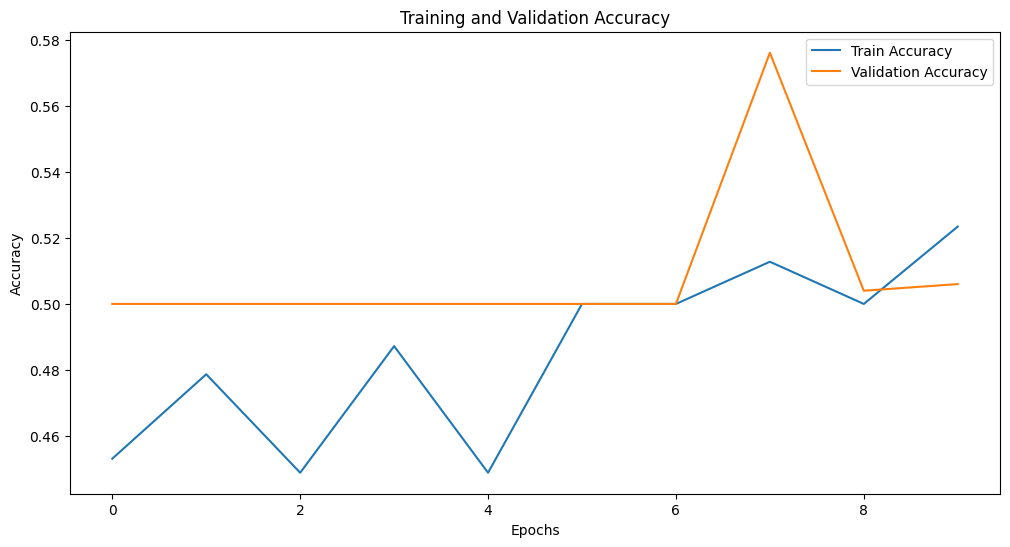

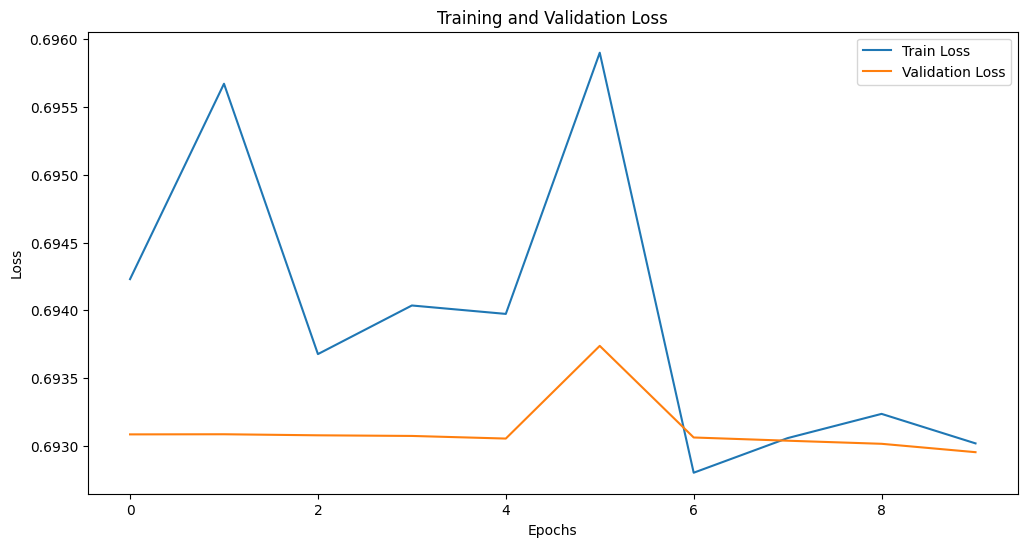

Model saved as 'qgaf_cnn_model.h5'.


In [ ]:
# Install necessary libraries
!pip install tensorflow matplotlib scikit-learn --quiet

# Import necessary libraries
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Ask user to upload the zip file
print("Please upload your dataset zip file.")
uploaded = files.upload()

# Unzip the file
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall("dataset")

# Define paths
base_dir = "dataset"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load data with grayscale conversion
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(30, 30),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(30, 30),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(30, 30),
    batch_size=32,
    class_mode='binary',
    shuffle=False,
    color_mode='grayscale'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (up or down)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Evaluate on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on test data
predictions = (model.predict(test_generator) > 0.5).astype("int32")
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=class_labels))

# Plot training results
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
model.save('qgaf_cnn_model.h5')
print("Model saved as 'qgaf_cnn_model.h5'.")
